In [1]:
%matplotlib inline
import pandas
import numpy
import seaborn
import matplotlib

In [2]:
raw_table = pandas.read_csv("counts_table.tsv", sep="\t")

In [3]:
raw_table.head()

,Geneid,Chr,Start,End,Strand,Length,Aligned.sortedByCoord.out.bam,STAR_ERR1755082Aligned.sortedByCoord.out.bam,ERR1755084_STAR.bam,ERR1755086,ERR1755087Aligned.sortedByCoord.out.bam
0,ENSMUSG00000090025,1,3054233,3054733,+,501,0,0,0,0,0
1,ENSMUSG00000064842,1,3102016,3102125,+,110,0,0,0,0,0
2,ENSMUSG00000051951,1;1;1,3205901;3206523;3214482,3216344;3215632;3671498,-;-;-,465598,13,8,8,6,10
3,ENSMUSG00000089699,1,3466587,3513553,+,46967,0,0,0,0,0
4,ENSMUSG00000088333,1,3783876,3783933,-,58,0,0,0,0,0


In [4]:
raw_table["Strand"] = raw_table.Strand.str[0]
raw_table.head()
len(raw_table)

39179

In [5]:
gene_table = raw_table.drop(["Chr", "Start", "End", "Strand", "Length"], axis=1).set_index("Geneid")
gene_table.head()

,Aligned.sortedByCoord.out.bam,STAR_ERR1755082Aligned.sortedByCoord.out.bam,ERR1755084_STAR.bam,ERR1755086,ERR1755087Aligned.sortedByCoord.out.bam
Geneid,,,,,
ENSMUSG00000090025,0,0,0,0,0
ENSMUSG00000064842,0,0,0,0,0
ENSMUSG00000051951,13,8,8,6,10
ENSMUSG00000089699,0,0,0,0,0
ENSMUSG00000088333,0,0,0,0,0


In [6]:
gene_table = gene_table.replace(0, numpy.nan).dropna(how="all", axis=0)

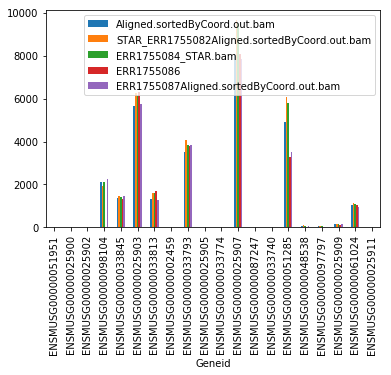

In [7]:
gene_table.head(20).plot(kind="bar")

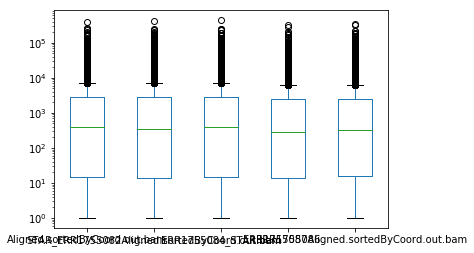

In [8]:
gene_table.plot(kind="box", logy=True)

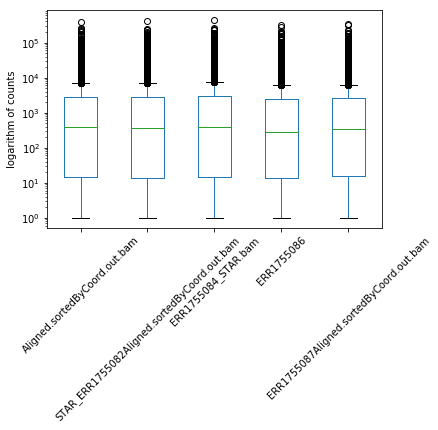

In [9]:
ax = gene_table.plot(kind="box", logy=True)
ax.set_ylabel("logarithm of counts")
ax.xaxis.set_tick_params(rotation=45)

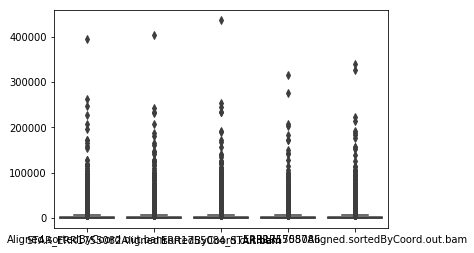

In [10]:
seaborn.boxplot(data=gene_table)

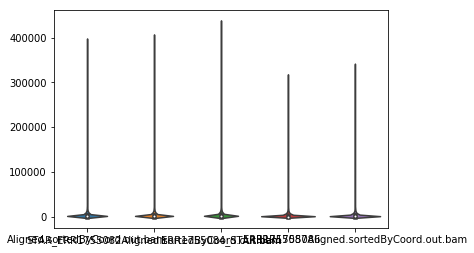

In [11]:
seaborn.violinplot(data=gene_table)

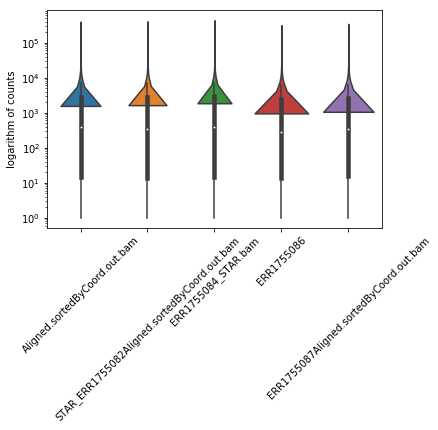

In [12]:
ax = seaborn.violinplot(data=gene_table)
ax.set_ylabel("logarithm of counts")
ax.set_yscale("log")
ax.xaxis.set_tick_params(rotation=45)

In [13]:
melted_table = gene_table.melt()
melted_table.head()

,variable,value
0,Aligned.sortedByCoord.out.bam,13.0
1,Aligned.sortedByCoord.out.bam,2.0
2,Aligned.sortedByCoord.out.bam,NaN
3,Aligned.sortedByCoord.out.bam,2115.0
4,Aligned.sortedByCoord.out.bam,1362.0


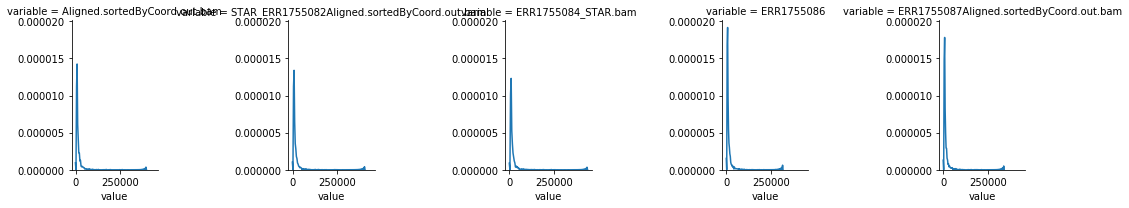

In [14]:
g = seaborn.FacetGrid(melted_table, col="variable")
g.map(seaborn.kdeplot, "value")

In [15]:
melted_table_with_strand = raw_table.drop(["Chr", "Start", "End", "Length"], axis=1).melt(id_vars=["Geneid", "Strand"])
melted_table_with_strand.head()

,Geneid,Strand,variable,value
0,ENSMUSG00000090025,+,Aligned.sortedByCoord.out.bam,0
1,ENSMUSG00000064842,+,Aligned.sortedByCoord.out.bam,0
2,ENSMUSG00000051951,-,Aligned.sortedByCoord.out.bam,13
3,ENSMUSG00000089699,+,Aligned.sortedByCoord.out.bam,0
4,ENSMUSG00000088333,-,Aligned.sortedByCoord.out.bam,0


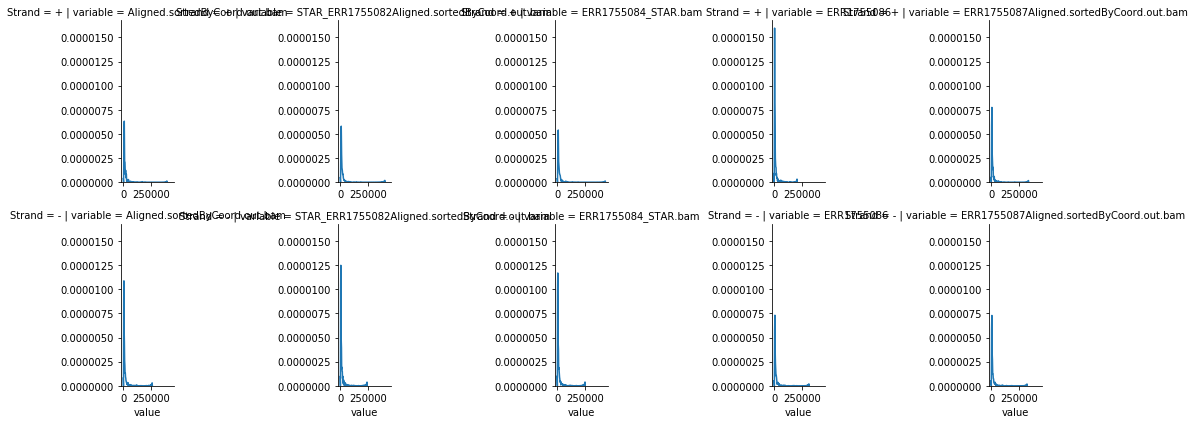

In [16]:
g = seaborn.FacetGrid(melted_table_with_strand, col="variable", row="Strand")
g.map(seaborn.kdeplot, "value")

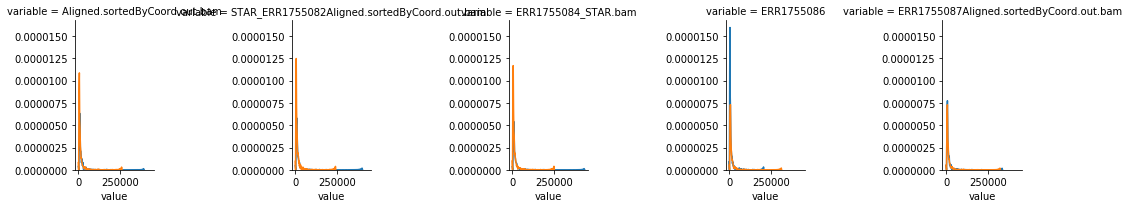

In [17]:
g = seaborn.FacetGrid(melted_table_with_strand, col="variable", hue="Strand")
g.map(seaborn.kdeplot, "value")

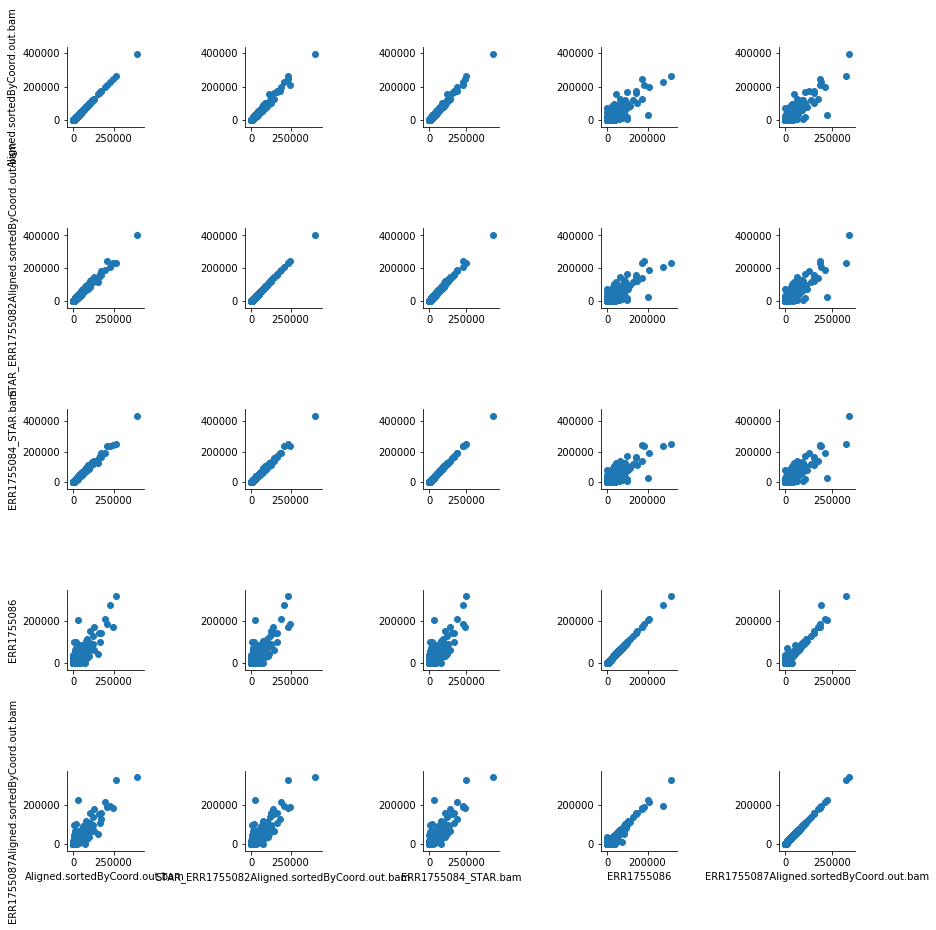

In [18]:
g = seaborn.PairGrid(gene_table)
g = g.map(plt.scatter)

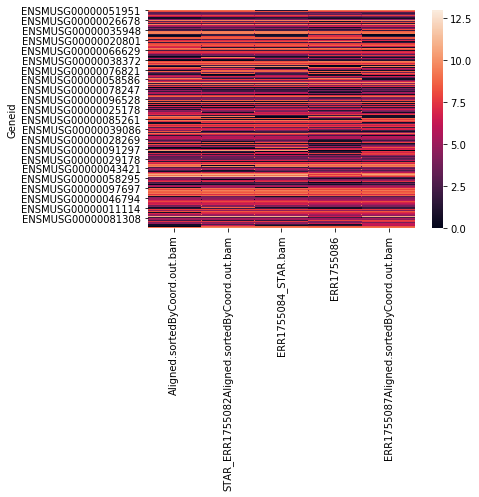

In [19]:
seaborn.heatmap(numpy.log(gene_table))

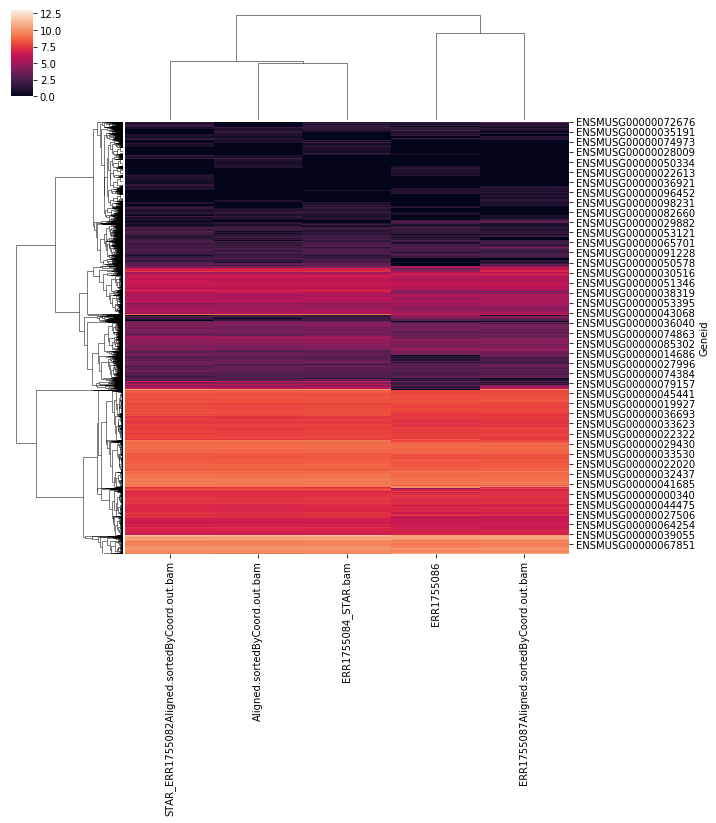

In [20]:
seaborn.clustermap(numpy.log(gene_table.fillna(0) + 1))